Visualization methods depend on number of variables (univariate, bivariate, multivariate) and type of variables (discrete, continuous) 

Discrete variables:
    * Bar plot
    * Pie chart
    * Dot chart
    
Continuous variables:
    * Histogram
    * Box plot
Bivariate (continuous x continuous)
    * Scatter plot
    * Two dimensional histogram
    
Bivariate (continuous x categorical)
    * Multiple Box plots
    * Colored scatter plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

## Load data

In [2]:
print(sns.get_dataset_names())

/home/anar/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/anar/anaconda3/lib/python3.8/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
df_penguins = sns.load_dataset("penguins")

In [4]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Discrete variables

### Bar plot

In [5]:
species, counts = df_penguins['species'].value_counts().index, df_penguins['species'].value_counts().values

Text(0.5, 0, 'species')

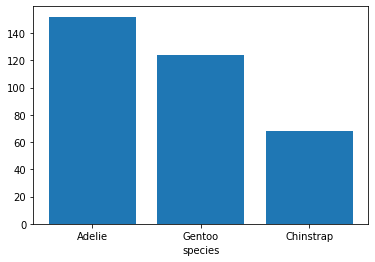

In [12]:
plt.bar(species, counts)
plt.xlabel('species')

<BarContainer object of 3 artists>

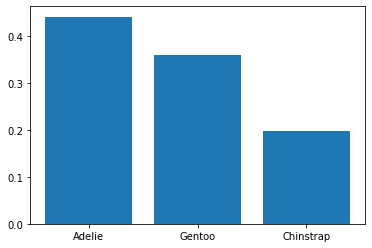

In [7]:
plt.bar(species, counts/sum(counts))

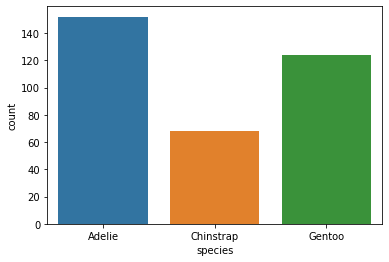

In [8]:
sns.countplot(x='species', data=df_penguins)

### Pie chart

(-1.1186900237692792,
 1.1008900011318705,
 -1.1187535413556606,
 1.1279276460500207)

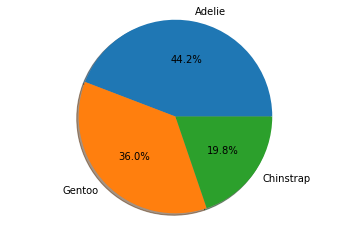

In [9]:
fig, ax = plt.subplots()
ax.pie(counts, labels=species, autopct='%1.1f%%', shadow=True)
ax.axis('equal')

## Continuous variables

### Histogram

/home/anar/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/anar/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'body_mass_g')

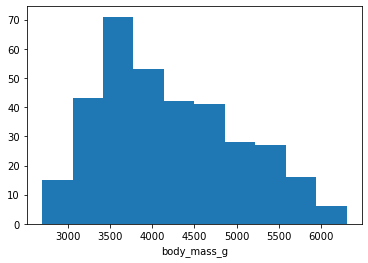

In [10]:
plt.hist(df_penguins['body_mass_g'])
plt.xlabel('body_mass_g')

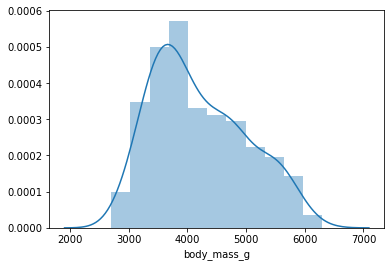

In [11]:
sns.distplot(df_penguins['body_mass_g'])

### Box plot

In [43]:
df_penguins.loc[df_penguins['body_mass_g'].notnull(), 'body_mass_g']

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 342, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0a5fc5f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0a5fc5fa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0a5fc5f070>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0a5ffba1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0a5ffba5e0>],
 'means': []}

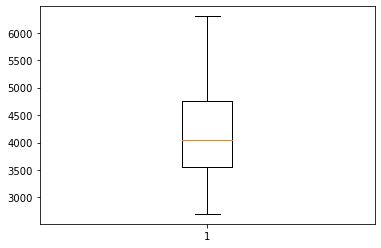

In [44]:
plt.boxplot(df_penguins.loc[df_penguins['body_mass_g'].notnull(), 'body_mass_g'])

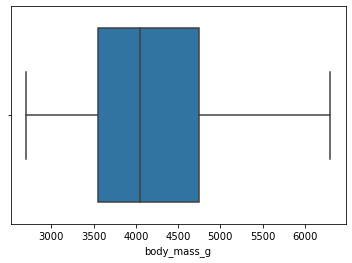

In [37]:
sns.boxplot(x='body_mass_g', data=df_penguins, )

Interpretation:


middle line - median


edges of box 25th percentile and 75th percentile


upper or right whisker min(x_max, Q3 + 1.5(Q3-Q1))


lower or left whisker max(x_min, Q1 - 1.5(Q3-Q1))

## Bivariate continuous x continuous

In [45]:
df_penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Text(0, 0.5, 'bill_depth_mm')

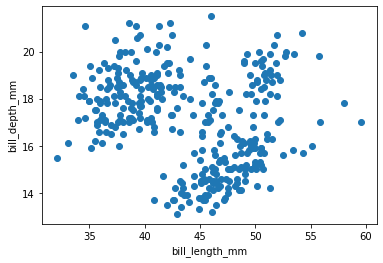

In [13]:
plt.scatter(df_penguins['bill_length_mm'], df_penguins['bill_depth_mm'])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')

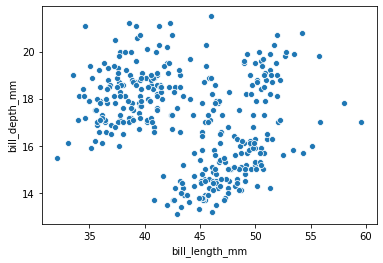

In [14]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df_penguins)

### Two dimensional histogram

(array([[ 0.,  0.,  1.,  1.,  2.,  2.,  1.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  3., 11., 12.,  8.,  5.,  1.,  0.],
        [ 0.,  0.,  0.,  1., 12., 15., 14.,  7.,  5.,  3.],
        [ 5.,  2.,  0.,  0.,  5.,  8., 15.,  7.,  3.,  3.],
        [12., 13.,  4.,  3.,  4.,  5.,  3.,  4.,  1.,  0.],
        [ 4., 16., 15.,  4.,  4.,  7.,  4.,  0.,  0.,  1.],
        [ 0.,  4., 11., 18.,  2.,  4.,  9., 10.,  3.,  0.],
        [ 0.,  0.,  1.,  2.,  2.,  1.,  2.,  4.,  3.,  1.],
        [ 0.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.]]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 array([13.1 , 13.94, 14.78, 15.62, 16.46, 17.3 , 18.14, 18.98, 19.82,
        20.66, 21.5 ]),
 <matplotlib.collections.QuadMesh at 0x7fb753dcc820>)

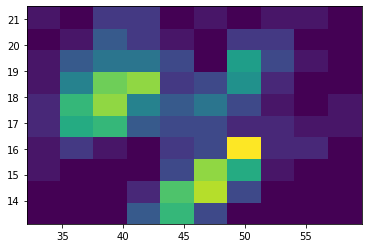

In [17]:
plt.hist2d(x=df_penguins.loc[df_penguins['bill_length_mm'].notnull(),'bill_length_mm'],
           y=df_penguins.loc[df_penguins['bill_depth_mm'].notnull(),'bill_depth_mm'])

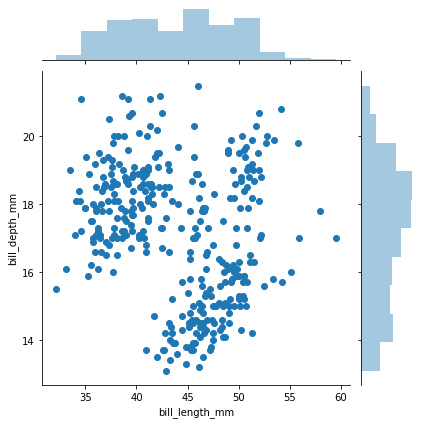

In [18]:
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df_penguins)

## Bivariate continuous x categorical

### Box plot

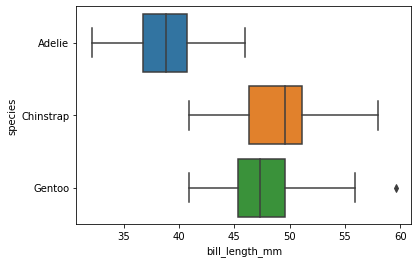

In [19]:
sns.boxplot(x='bill_length_mm', y='species', data=df_penguins)

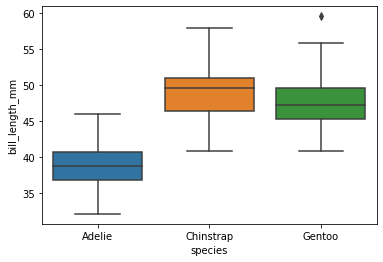

In [20]:
sns.boxplot(x='species', y='bill_length_mm', data=df_penguins)

### Colored scatter plot

In [37]:
list(df_penguins['species'].astype('category').cat.categories)

['Adelie', 'Chinstrap', 'Gentoo']

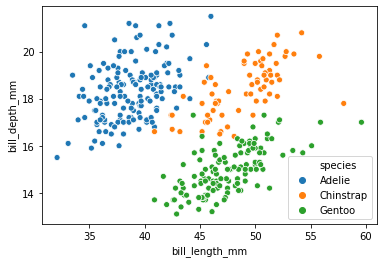

In [40]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df_penguins)